### Correspondence Analysis (CA) using Prince
This example is taken from the [Prince website](https://github.com/MaxHalford/Prince).

You should be using correspondence analysis when you want to analyse a contingency table. In other words you want to analyse the dependencies between two categorical variables.

The following example comes from section 17.2.3 of
_Modern Multivariate Statistical Techniques_, by Alan Izenman.
It relates to data on hair color and eye color of a sample of 5,387
schoolchildren from Caithness, Scotland.

In [12]:
import pandas as pd
from prince import CA
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

In [3]:
X = pd.DataFrame(
    data=[
        [326, 38, 241, 110, 3],
        [688, 116, 584, 188, 4],
        [343, 84, 909, 412, 26],
        [98, 48, 403, 681, 85]
    ],
    columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
    index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
)
X

,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [7]:
ca = CA(
    n_components=2,
    n_iter=3,
    copy=True,
    engine='auto',
    random_state=42
)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
ca = ca.fit(X)

In [8]:
ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


In [9]:
ca.column_coordinates(X)

,0,1
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


<Figure size 500x500 with 0 Axes>

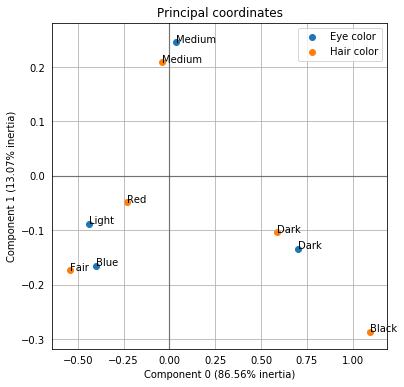

In [17]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.sca(ca.plot_coordinates(
    X=X,
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
))
#ax.get_figure().savefig('ca_coordinates.png')
plt.show()

In [18]:
ca.eigenvalues_

[0.19924475202819097, 0.030086774100411818]

In [19]:
ca.total_inertia_

0.23019100748666482

In [20]:
ca.explained_inertia_

[0.8655627090025808, 0.13070351630549587]